In [1]:
import os
import seaborn
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def get_test_results(path):
    base_dir = '../RDL/relbench/results'
    seed = 42
    
    runs = [name[:-5] for name in os.listdir(os.path.join(base_dir, path))]
    results = {}
    
    search_string = 'Test metrics: '
    for run in runs:
        cur_path = os.path.join(base_dir, run, str(seed), 'logging.log')
        test_stats = None
        try:
            with open(cur_path, 'r') as f:
                for line_number, line in enumerate(f, 1):  # Starting at line 1
                    # Check if the search string is in the current line
                    if search_string in line:
                        # Return the line along with its line number
                        test_stats = line[len(search_string):]
                        break
        except:
            print(f'{cur_path} does not have a log')
        if test_stats is None:
            print(f'{run} does not have test stats')
            continue
        test_stats = eval(test_stats)
        results[run] = test_stats
    return results

# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'stackex-engage-attn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_model.aggr_sum_mean_max'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_model.hetero_aggr_sum_mean_max'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.use_self_join_True_False_loader.num_neighbors_16_32_64_128_256'
# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.use_self_join_True_False_model.aggr_sum_mean_max'
# yaml_collection_path = 'stackex-votes_model.channels_64_128_model.use_self_join_True_False_loader.num_neighbors_16_32_64_128_256'
# yaml_collection_path = 'amazon_ltv_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_product_churn_model.channels_64_128_model.use_self_join_True_False_optim.base_lr_0.01_0.001'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_4_model.use_self_join_True_False'
# yaml_collection_path = 'stackex-engage_model.channels_64_128_model.num_layers_2_3_4_model.use_self_join_True_False'
# yaml_collection_path = 'amazon_churn_model.channels_64_128_model.num_layers_2_3_model.use_self_join_True_False_loader.temporal_strategy_uniform_last'
yaml_collection_path = 'f1-dnf-sj_model.channels_64_128_256_model.num_layers_2_model.use_self_join_True_False_model.dropout_0.0_0.2_0.5_0.8_optim.base_lr_0.01_0.001'
res = get_test_results(yaml_collection_path)

# Define hyperparameters to investigate
hparams = {
    'model.channels': [64, 128],
    # 'model.conv': ['sage', 'gat'],
    'model.num_layers': [2, 3],
    'model.use_self_join': [True, False],
    # 'model.aggr': ['sum', 'mean', 'max'],
    # 'model.hetero_aggr': ['sum', 'mean', 'max'],
    # 'optim.base_lr': [0.01, 0.001],
    # 'loader.num_neighbors': [16, 32, 64, 128, 256],
    'loader.temporal_strategy': ['uniform', 'last']
}
for key in res:
    print(key, '   ', res[key])
param_to_plot = 'loader.temporal_strategy'
a = []
columns = [param_to_plot, 'average_precision', 'accuracy', 'f1', 'roc_auc']  # classification
# columns = [param_to_plot, 'mae', 'rmse']  # regression
cnt = 0
for value in hparams[param_to_plot]:
    name = param_to_plot + '_' + str(value)
    for exp_name in res:
        if name not in exp_name:
            continue
        cur_res = res[exp_name]
        cur_a = [value]
        for col in columns[1:]:
            cur_a.append(cur_res[col])
        a.append(cur_a)
a = pd.DataFrame(data=a, columns=columns)
print(a)
        

Empty DataFrame
Columns: [loader.temporal_strategy, average_precision, accuracy, f1, roc_auc]
Index: []


/tmp/user/23140/ipykernel_2641745/176417470.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = seaborn.boxplot(data=a, y='roc_auc', x=param_to_plot, palette="Blues", whis=(0, 100))


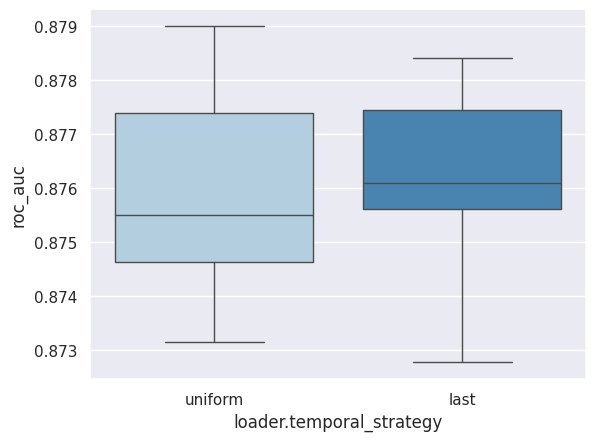

In [18]:
%matplotlib inline
seaborn.set(style="darkgrid")

ax = seaborn.boxplot(data=a, y='roc_auc', x=param_to_plot, palette="Blues", whis=(0, 100))
# ax = seaborn.violinplot(data=a, y='rmse', x=param_to_plot, palette="Blues")

### Ends here

In [49]:
def get_test_results(path):
    base_dir = 'results'
    seed = 42
    
    runs = [name[:-5] for name in os.listdir(os.path.join(base_dir, path))]
    results = {}
    
    search_string = 'Test metrics: '
    for run in runs:
        cur_path = os.path.join(base_dir, run, str(seed), 'logging.log')
        test_stats = None
        try:
            with open(cur_path, 'r') as f:
                for line_number, line in enumerate(f, 1):  # Starting at line 1
                    # Check if the search string is in the current line
                    if search_string in line:
                        # Return the line along with its line number
                        test_stats = line[len(search_string):]
                        break
        except:
            print(f'{cur_path} does not have a log')
        if test_stats is None:
            print(f'{run} does not have test stats')
            continue
        test_stats = eval(test_stats)
        results[run] = test_stats
    return results
    

yaml_collection_path = 'stackex-engage_model.channels_32_64_128_model.num_layers_2_3_model.use_self_join_False_optim.base_lr_0.01_0.005_0.001'
res = get_test_results(yaml_collection_path)
yaml_collection_path1 = 'stackex-engage_model.channels_32_64_128_model.num_layers_2_3_model.use_self_join_True_optim.base_lr_0.01_0.005_0.001'
res1 = get_test_results(yaml_collection_path1)
# print(res)
# print(res1)

stackex-engage_model.channels_64_model.num_layers_3_model.use_self_join_False_optim.base_lr_0.005_run does not have test stats
stackex-engage_model.channels_64_model.num_layers_2_model.use_self_join_False_optim.base_lr_0.01_run does not have test stats
stackex-engage_model.channels_32_model.num_layers_3_model.use_self_join_False_optim.base_lr_0.005_run does not have test stats
stackex-engage_model.channels_64_model.num_layers_2_model.use_self_join_False_optim.base_lr_0.001_run does not have test stats


In [50]:
a = []
columns = ['selfjoin', 'average_precision', 'accuracy', 'f1', 'roc_auc']
cnt = 0
for exp_name in res:
    cur_res = res[exp_name]
    cur_a = [False]
    for col in columns[1:]:
        cur_a.append(cur_res[col])
    a.append(cur_a)
for exp_name in res1:
    cur_res = res1[exp_name]
    cur_a = [True]
    for col in columns[1:]:
        cur_a.append(cur_res[col])
    a.append(cur_a)
a = pd.DataFrame(data=a, columns=columns)
print(a)

    selfjoin  average_precision  accuracy        f1   roc_auc
0      False           0.459299  0.948512  0.383926  0.878598
1      False           0.454640  0.946969  0.393302  0.875479
2      False           0.448392  0.945698  0.411171  0.873291
3      False           0.437648  0.945902  0.394924  0.869246
4      False           0.424755  0.939276  0.413158  0.869407
5      False           0.442168  0.945267  0.402970  0.874033
6      False           0.452106  0.948092  0.380333  0.875965
7      False           0.448121  0.947729  0.383514  0.874174
8      False           0.438994  0.947377  0.366912  0.872435
9      False           0.446648  0.944246  0.424994  0.875226
10     False           0.440880  0.945732  0.417205  0.874653
11     False           0.445939  0.942805  0.432384  0.874612
12     False           0.453223  0.948001  0.386397  0.875931
13     False           0.455616  0.947570  0.383620  0.877269
14      True           0.456637  0.947411  0.407062  0.877624
15      

/tmp/user/23140/ipykernel_1078721/846703776.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = seaborn.boxplot(data=a, y='f1', x='selfjoin', palette="Blues")


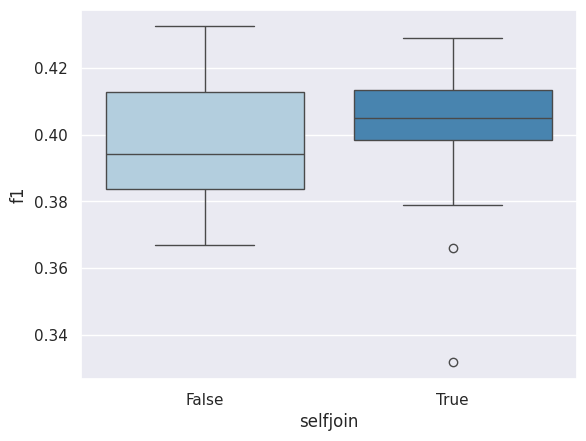

In [56]:
%matplotlib inline
seaborn.set(style="darkgrid")

ax = seaborn.boxplot(data=a, y='f1', x='selfjoin', palette="Blues")

In [13]:
import torch
a = torch.randn(12,128)
a

tensor([[ 1.5526,  0.6703,  1.2302,  ..., -0.0630, -1.7411,  0.7213],
        [-0.1281, -0.2484, -1.2759,  ...,  1.2417, -1.5698,  0.7059],
        [ 1.1681,  0.2591, -1.1529,  ...,  0.2187,  0.3762, -0.3652],
        ...,
        [-0.9252, -1.8957,  2.6438,  ...,  2.5184,  0.4527,  0.2948],
        [-0.4808, -0.3784,  0.1630,  ...,  0.4860, -2.0863,  0.2761],
        [ 0.5362,  0.5951,  0.4550,  ...,  1.5742,  0.6540,  1.2391]])

In [15]:
b = torch.nn.functional.dropout(a, p=0.5, training=True)

In [16]:
b

tensor([[ 3.1051,  0.0000,  0.0000,  ..., -0.1260, -3.4822,  0.0000],
        [-0.2562, -0.0000, -2.5517,  ...,  0.0000, -0.0000,  1.4119],
        [ 0.0000,  0.5182, -2.3057,  ...,  0.0000,  0.0000, -0.0000],
        ...,
        [-0.0000, -3.7914,  5.2877,  ...,  5.0368,  0.0000,  0.5895],
        [-0.0000, -0.0000,  0.3260,  ...,  0.0000, -4.1725,  0.0000],
        [ 1.0724,  1.1901,  0.9101,  ...,  0.0000,  0.0000,  2.4781]])